In [237]:
# Uploading and reading dataset
import pandas as pd
df = pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [238]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [239]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [240]:
df.shape

(614, 13)

In [241]:
# Dataset summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [244]:
# Checking for na
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [245]:
# Apply Missing Value Treatment (Clean Code)
# Fill categorical columns with mode

cat_cols = [
    "Gender", "Married", "Dependents",
    "Self_Employed", "Property_Area"
]

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [246]:
# Fill numerical columns  with median

num_cols = [
    "LoanAmount", "Loan_Amount_Term", "Credit_History"
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [247]:
# Confirming filling all na
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [248]:
# How many loans were approved or rejected

df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

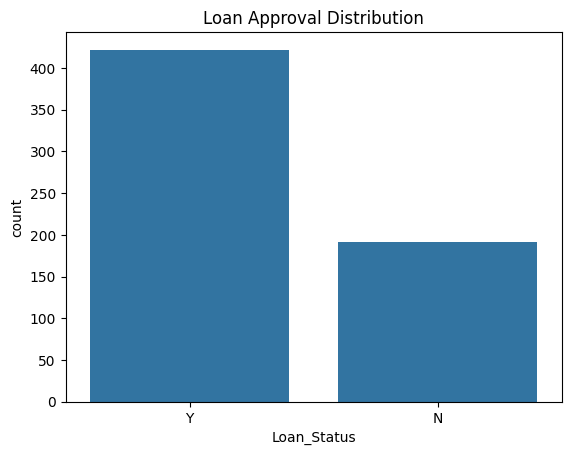

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Approval Distribution")
plt.show()

In [250]:
# Approval Rate by Credit History
# Does credit history affect loan approval?

pd.crosstab(df["Credit_History"], df["Loan_Status"], normalize="index")

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.209524,0.790476


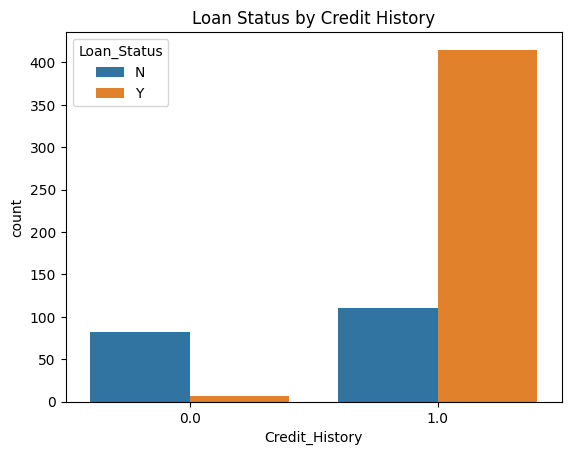

In [251]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=df)
plt.title("Loan Status by Credit History")
plt.show()

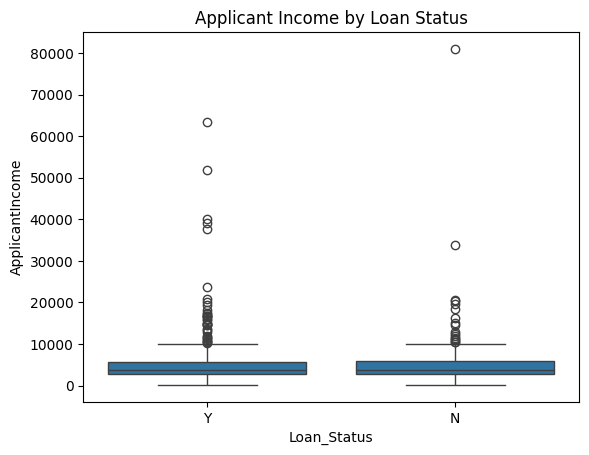

In [252]:
# Applicant Income vs Loan Approval
# Are higher-income applicants more likely to be approved?

sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.title("Applicant Income by Loan Status")
plt.show()

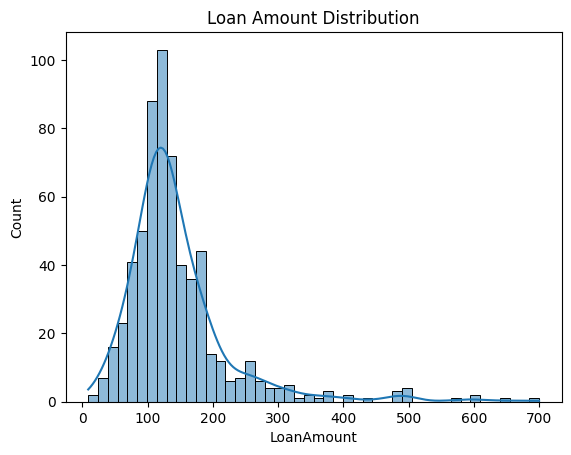

In [253]:
# Loan Amount Distribution
# Important for:
# 1) Detecting skewness
# 2) Deciding whether scaling is needed

sns.histplot(df["LoanAmount"], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

In [254]:
# Property Area & Approval
pd.crosstab(df["Property_Area"], df["Loan_Status"], normalize="index")

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


In [255]:
# prepare the data for machine learning. 
# Machine learning models. Require numerical inputs


In [256]:
# Separate Target and Features
# X = Independent variables (inputs)
# y = Dependent variable (what we predict)

x = df.drop("Loan_Status", axis = 1)
y = df["Loan_Status"]
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [257]:
# Drop Identifier Column (Loan_ID) because keeping it can mislead the model

x2 = x.drop("Loan_ID", axis = 1)
x2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [258]:
# Encode Target Variable. We convert:
# Y = 1 (Approved)
# N = 0 (Rejected)

y = y.map({ "Y": 1 , "N": 0 })
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [259]:
# Encode Categorical Features to make sure there are no artificial oerdering and also safe for logistic regression.
# drop_first=True prevents multicollinearity.

x2 = pd.get_dummies( x2, drop_first = True)

In [260]:
# Train-Test Split
# stratify=y preserves class balance

from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test = train_test_split( 
    x2, y, test_size = 0.2, random_state = 42, stratify = y
)

In [261]:
# Feature Scaling (Critical for Logistic Regression)
   # Why scale?
    # Logistic Regression is distance-based.
    # Income and loan amounts vary widely

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.fit_transform(x2_test)

In [262]:
# Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit (x2_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [282]:
# Making prediction

y_pred = model.predict(x2_test_scaled)

                      

In [264]:
# Evaluate Model Performance
  # Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8617886178861789

In [265]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [266]:
# Confusion Matrix (Business View)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

cm

array([[22, 16],
       [ 1, 84]])

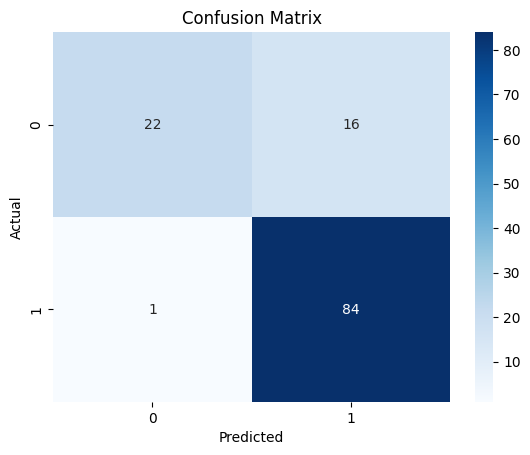

In [267]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [268]:
# Probability Thresholds & ROC Curve (Advanced, Interview-Level)
   # We do NOT trust accuracy alone.
   # We move to probabilities.

In [270]:
# Probability that loan is approved

y_probs = model.predict_proba(x2_test_scaled)[:,1]

In [271]:
import numpy as np
# Default Threshold (0.5)

import numpy as np

y_pred_05 = (y_probs>= 0.5).astype(int)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [276]:
# Change Threshold (Risk Control)
   # Since false positives are costly, we increase threshold the monitor the effect on loan approval.

y_pred_07 = ( y_probs>= 0.7).astype(int)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [277]:
# Compare Performance when threshold is increased to 0.7

print("threshhold = 0.5")
print(classification_report(y_test,y_pred_05))

print("threshhold = 0.7")
print(classification_report(y_test,y_pred_07))

threshhold = 0.5
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

threshhold = 0.7
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.87      0.88      0.88        85

    accuracy                           0.83       123
   macro avg       0.80      0.80      0.80       123
weighted avg       0.83      0.83      0.83       123



In [278]:
y_probs[:20]

array([0.08063715, 0.90184547, 0.75661592, 0.71630728, 0.89663323,
       0.8327807 , 0.88929813, 0.80885896, 0.72041047, 0.75091397,
       0.88609994, 0.85416364, 0.85396679, 0.79733982, 0.14076611,
       0.16708763, 0.6910956 , 0.17542804, 0.17989858, 0.75712254])

In [279]:
y_probs.min(), y_probs.max()

(np.float64(0.030921224021994896), np.float64(0.9358831205706608))

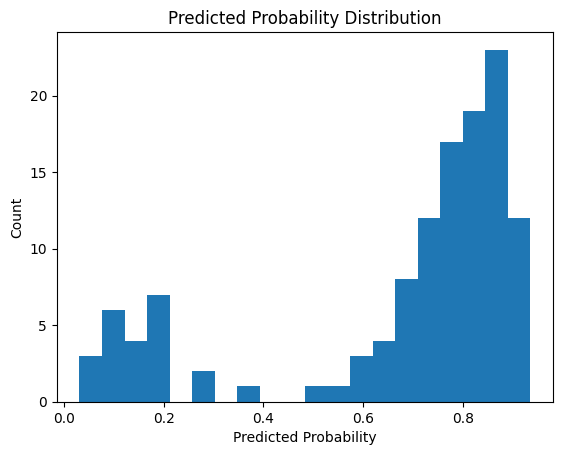

In [280]:
# Checking predicted probability distribution 

plt.hist(y_probs, bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Predicted Probability Distribution")
plt.show()

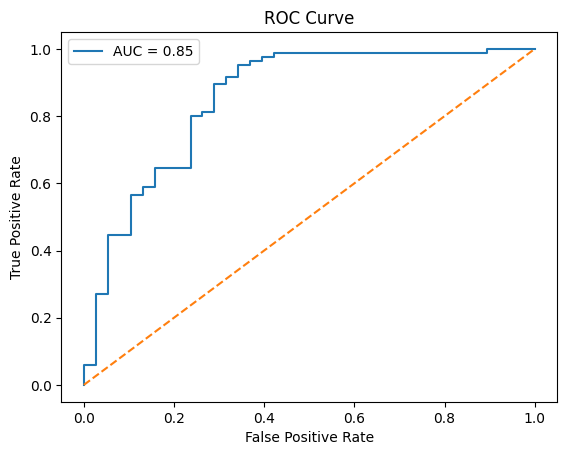

In [281]:
# Accessing model quality: ROC Curve & AUC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()